In [1]:
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt

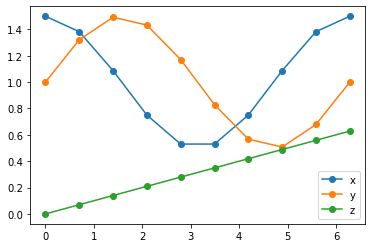

In [63]:
time=np.linspace(0,2*np.pi, 10)
#Helix Function 
Origin = (1.0, 1.0, 0.0)
raidus = 0.5
move_speed = 0.1 
x=Origin[0] + raidus*np.cos(time)
y=Origin[1] + raidus*np.sin(time)
z=Origin[2] + move_speed*time

plt.plot(time,x,'o-')
plt.plot(time,y,'o-')
plt.plot(time,z,'o-')
plt.legend(['x','y','z'])

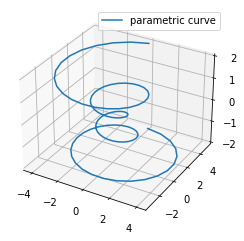

In [68]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

In [5]:
Streamline=pv.read('trajectory.vtp')

In [6]:
Streamline

PolyData (0x199bfbde340)
  N Cells:	1
  N Points:	47
  X Bounds:	1.115e-01, 1.957e+00
  Y Bounds:	4.816e-01, 5.009e-01
  Z Bounds:	9.307e-02, 1.010e-01
  N Arrays:	5

In [7]:
#Get the coordinates from a streamline
Coords=Streamline.points

#Get the time from a streamline
Timestep=0.0025 #secs
SimTime=len(Coords)*Timestep
Times=np.linspace(0,SimTime,len(Coords),endpoint=False)

In [19]:
print(Coords)

[[0.111488   0.500337   0.10021   ]
 [0.226643   0.50035799 0.100077  ]
 [0.339322   0.50002402 0.099991  ]
 [0.452216   0.50062603 0.100044  ]
 [0.56129098 0.50092101 0.099993  ]
 [0.662296   0.499419   0.0999708 ]
 [0.75690103 0.497637   0.100127  ]
 [0.83296299 0.49606201 0.100312  ]
 [0.887564   0.49336901 0.100961  ]
 [0.92821097 0.491254   0.101026  ]
 [0.954983   0.48842701 0.100514  ]
 [0.97499901 0.48503    0.0998541 ]
 [0.99223    0.482638   0.0991416 ]
 [1.00616002 0.48160601 0.0984895 ]
 [1.01987004 0.48260999 0.0977835 ]
 [1.03456998 0.48334101 0.0963855 ]
 [1.04982996 0.48665199 0.0953826 ]
 [1.06894004 0.48990399 0.0939438 ]
 [1.09466004 0.49305999 0.0931367 ]
 [1.12653995 0.495067   0.0930675 ]
 [1.16287005 0.49601999 0.0933982 ]
 [1.18894994 0.49405    0.0941652 ]
 [1.20779002 0.49251899 0.0951174 ]
 [1.22196996 0.490704   0.0954586 ]
 [1.23655999 0.48955899 0.0960096 ]
 [1.2493     0.48996601 0.0963497 ]
 [1.26210999 0.49043    0.0962076 ]
 [1.27688003 0.49068701 0.09

In [18]:
print(Times)

[0.     0.0025 0.005  0.0075 0.01   0.0125 0.015  0.0175 0.02   0.0225
 0.025  0.0275 0.03   0.0325 0.035  0.0375 0.04   0.0425 0.045  0.0475
 0.05   0.0525 0.055  0.0575 0.06   0.0625 0.065  0.0675 0.07   0.0725
 0.075  0.0775 0.08   0.0825 0.085  0.0875 0.09   0.0925 0.095  0.0975
 0.1    0.1025 0.105  0.1075 0.11   0.1125 0.115 ]


In [10]:
def interpCameraPos(t, Coords, Times):
    pos=np.zeros(3)
    focal_pos=np.zeros(3) 
    up_vector=np.array([0.0,0.0,1.0])

    #Do some interpolation
    for i in range(len(Coords)-1):
        start_pos,start_focal_pos=Coords[i],Times[i]
        end_pos,end_focal_pos=Coords[i+1],Times[i+1]
        
        if (pos0>start_pos and pos0<=end_pos):
            
            gradient = (end_focal_pos-start_focal_pos)/(end_pos-start_pos)
            Coords0 = start_focal_pos + gradient*(pos0-start_pos)
            
            return Coords0
    return pos, focal_pos, up_vector

In [48]:
def interpX(time_input, Times, X_coord):
    #print('Time input=',time_input)
    #print('Times=',Times[0:5])
    #print('CoordX=',X_coord[0:5])

    #find interval
    for i in range(len(Times)-1):
        start_time,start_coord=Times[i],X_coord[i]
        end_time,end_coord=Times[i+1],X_coord[i+1]
        #print('Index',(i,i+1), 
        #      'TimeInterval', (start_time,end_time),
        #      'EndPts', (start_coord,end_coord) )
        if (time_input>start_time and time_input<=end_time): #we are in i-th interval
            #print("We are in the interval",i+1)
            gradient = (end_coord-start_coord)/(end_time-start_time)
            interp_coord = start_coord + gradient*(time_input-start_time)
    
    return interp_coord

In [59]:
X_coords,Y_coords,Z_coords=Coords[:,0],Coords[:,1],Coords[:,2]

time_input=0.061
x_interp=interpX(time_input, Times, X_coords)
y_interp=interpX(time_input, Times, Y_coords)
z_interp=interpX(time_input, Times, Z_coords)

print("Input Time=",time_input)
print('Interp Coord=',x_interp,y_interp,z_interp)

Input Time= 0.061
Interp Coord= 1.241655993461609 0.4897217988967896 0.09614563882350921


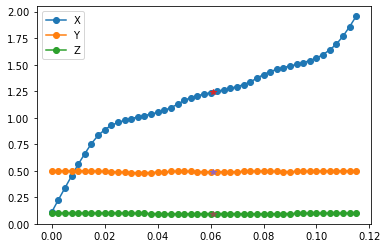

In [60]:
plt.plot(Times,X_coords,'o-')
plt.plot(Times,Y_coords,'o-')
plt.plot(Times,Z_coords,'o-')

plt.plot(time_input,x_interp,'*')
plt.plot(time_input,y_interp,'*')
plt.plot(time_input,z_interp,'*')
plt.legend(['X','Y','Z'])
#print(x)

In [ ]:
focal_pos_interp=interp(0.00375, pos, focal_pos)

In [8]:
def interpCameraPos(t, Coords, Times):
    pos=np.zeros(3)
    focal_pos=np.zeros(3) 
    up_vector=np.array([0.0,0.0,1.0])

    #Do some interpolation
    
    return pos, focal_pos, up_vector

In [14]:
pos, focal_pos, up_vector = interpCameraPos(0.00375, Coords, Times)
print('Camera Position=',pos)
print('Camera focal_pos=',focal_pos)
print('Camera up-vector=',up_vector)

Camera Position= [0. 0. 0.]
Camera focal_pos= [0. 0. 0.]
Camera up-vector= [0. 0. 1.]


In [16]:
(0.0025+0.005)/2.0

0.00375